In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_bowling = pd.read_csv("C:\\Users\\sanja\\Downloads\\IPL2023_Bowler.csv")
df_bowling

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3
...,...,...,...,...,...,...,...,...
848,70,Wayne Parnell,Royal Challengers Bangalore,3.1,42,0,1,13.5
849,70,Vijaykumar Vyshak,Royal Challengers Bangalore,4.0,40,1,0,10.0
850,70,Himanshu Sharma,Royal Challengers Bangalore,3.0,28,0,0,9.3
851,70,Harshal Patel,Royal Challengers Bangalore,4.0,29,1,0,7.3


In [3]:
df_batsman = pd.read_csv("C:\\Users\\sanja\\Downloads\\IPL2023_Batsman.csv", encoding='unicode_escape')
df_batsman

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little
...,...,...,...,...,...,...,...,...
1109,70,Shubman Gill,Gujarat Titans,104,52,5,8,Not Out
1110,70,Vijay Shankar,Gujarat Titans,53,35,7,2,Vijaykumar Vyshak
1111,70,Dasun Shanaka,Gujarat Titans,0,3,0,0,Harshal Patel
1112,70,David Miller,Gujarat Titans,6,7,1,0,Mohammed Siraj


In [4]:
def out_or_not(x):
    if(x == "Not Out"):
        return 0
    else:
        return 1   

In [5]:
df_batsman['out_or_not'] = df_batsman['out_by'].apply(out_or_not)

In [6]:
total_out = df_batsman.groupby("Batsman")['out_or_not'].sum().sort_index().reset_index()

In [7]:
total_out

,Batsman,out_or_not
0,Abdul Basith,0
1,Abdul Samad,4
2,Abhinav Manohar,6
3,Abhishek Sharma,11
4,Abishek Porel,4
...,...,...
171,Wayne Parnell,1
172,Wriddhiman Saha,13
173,Yash Dhull,3
174,Yashasvi Jaiswal,13


In [8]:
total_runs = df_batsman.groupby('Batsman')['Run'].sum().sort_index().reset_index()

In [9]:
total_runs

,Batsman,Run
0,Abdul Basith,1
1,Abdul Samad,169
2,Abhinav Manohar,114
3,Abhishek Sharma,225
4,Abishek Porel,33
...,...,...
171,Wayne Parnell,2
172,Wriddhiman Saha,287
173,Yash Dhull,16
174,Yashasvi Jaiswal,625


In [10]:
temp_df = pd.merge(total_runs, total_out, on='Batsman')

In [11]:
temp_df['batting_avg'] = temp_df['Run']/temp_df['out_or_not']

In [12]:
total_ball = df_batsman.groupby("Batsman")['Ball'].sum().sort_index().reset_index()

In [13]:
temp_df = pd.merge(temp_df, total_ball, on='Batsman')

In [14]:
temp_df['Strike_rate'] = (temp_df['Run']/temp_df['Ball']) *100

In [15]:
df_batsman['runs_by_4'] = df_batsman['4s']*4
df_batsman['runs_by_6'] = df_batsman['6s']*6
df_batsman['runs_by_boundries'] = df_batsman['runs_by_4'] + df_batsman['runs_by_6']
df_batsman

,match_no,Batsman,team,Run,Ball,4s,6s,out_by,out_or_not,runs_by_4,runs_by_6,runs_by_boundries
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami,1,0,0,0
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph,1,16,54,70
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan,1,16,6,22
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan,1,4,0,4
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little,1,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1109,70,Shubman Gill,Gujarat Titans,104,52,5,8,Not Out,0,20,48,68
1110,70,Vijay Shankar,Gujarat Titans,53,35,7,2,Vijaykumar Vyshak,1,28,12,40
1111,70,Dasun Shanaka,Gujarat Titans,0,3,0,0,Harshal Patel,1,0,0,0
1112,70,David Miller,Gujarat Titans,6,7,1,0,Mohammed Siraj,1,4,0,4


In [16]:
run_boundry = df_batsman.groupby("Batsman")['runs_by_boundries'].sum().sort_index().reset_index()

In [17]:
temp_df = pd.merge(temp_df, run_boundry, on="Batsman")

In [18]:
temp_df['boundry_percent'] = (temp_df['runs_by_boundries']/temp_df['Run'])*100

In [19]:
temp_df

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent
0,Abdul Basith,1,0,inf,1,100.000000,0,0.000000
1,Abdul Samad,169,4,42.250000,128,132.031250,106,62.721893
2,Abhinav Manohar,114,6,19.000000,83,137.349398,66,57.894737
3,Abhishek Sharma,225,11,20.454545,157,143.312102,148,65.777778
4,Abishek Porel,33,4,8.250000,31,106.451613,4,12.121212
...,...,...,...,...,...,...,...,...
171,Wayne Parnell,2,1,2.000000,5,40.000000,0,0.000000
172,Wriddhiman Saha,287,13,22.076923,221,129.864253,190,66.202091
173,Yash Dhull,16,3,5.333333,23,69.565217,4,25.000000
174,Yashasvi Jaiswal,625,13,48.076923,382,163.612565,488,78.080000


In [20]:
times_batted = df_batsman['Batsman'].value_counts().sort_index().reset_index()
times_batted

,index,Batsman
0,Abdul Basith,1
1,Abdul Samad,8
2,Abhinav Manohar,6
3,Abhishek Sharma,11
4,Abishek Porel,4
...,...,...
171,Wayne Parnell,1
172,Wriddhiman Saha,14
173,Yash Dhull,3
174,Yashasvi Jaiswal,14


In [21]:
times_batted.rename(columns={'index':"Batsman", "Batsman":"time_batted"}, inplace=True)

In [22]:
times_batted

,Batsman,time_batted
0,Abdul Basith,1
1,Abdul Samad,8
2,Abhinav Manohar,6
3,Abhishek Sharma,11
4,Abishek Porel,4
...,...,...
171,Wayne Parnell,1
172,Wriddhiman Saha,14
173,Yash Dhull,3
174,Yashasvi Jaiswal,14


In [23]:
temp_df = pd.merge(temp_df, times_batted,on="Batsman")

In [24]:
temp_df

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted
0,Abdul Basith,1,0,inf,1,100.000000,0,0.000000,1
1,Abdul Samad,169,4,42.250000,128,132.031250,106,62.721893,8
2,Abhinav Manohar,114,6,19.000000,83,137.349398,66,57.894737,6
3,Abhishek Sharma,225,11,20.454545,157,143.312102,148,65.777778,11
4,Abishek Porel,33,4,8.250000,31,106.451613,4,12.121212,4
...,...,...,...,...,...,...,...,...,...
171,Wayne Parnell,2,1,2.000000,5,40.000000,0,0.000000,1
172,Wriddhiman Saha,287,13,22.076923,221,129.864253,190,66.202091,14
173,Yash Dhull,16,3,5.333333,23,69.565217,4,25.000000,3
174,Yashasvi Jaiswal,625,13,48.076923,382,163.612565,488,78.080000,14


In [25]:
openers = temp_df[(temp_df['batting_avg'] > 50) & (temp_df['Strike_rate'] > 150) & (temp_df['boundry_percent'] > 50) & (temp_df['time_batted'] > 10)]

In [26]:
openers

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted
30,Cameron Green,381,7,54.428571,239,159.414226,242,63.517060,14
43,Faf du Plessis,730,13,56.153846,475,153.684211,456,62.465753,14
148,Shubman Gill,680,12,56.666667,446,152.466368,400,58.823529,14


<Axes: xlabel='Batsman', ylabel='Run'>

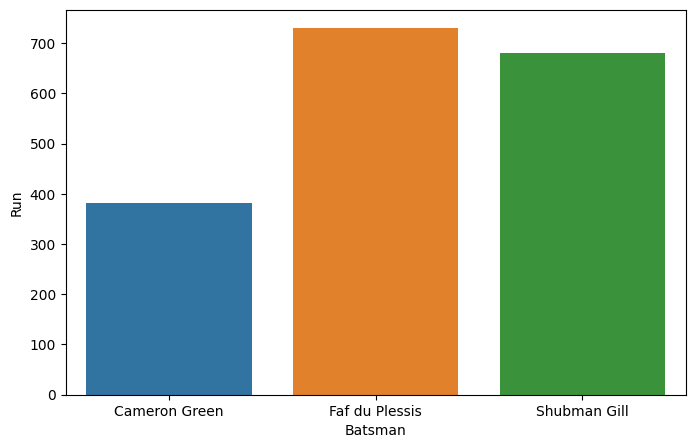

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="Batsman", y = 'Run', data=openers)

In [28]:
players = ['FAF DU PLESIS','SHUBMAN GILL']

In [29]:
temp_df['avg_ball_faced'] = round(temp_df['Ball']/temp_df['time_batted'])

In [30]:

temp_df

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted,avg_ball_faced
0,Abdul Basith,1,0,inf,1,100.000000,0,0.000000,1,1.0
1,Abdul Samad,169,4,42.250000,128,132.031250,106,62.721893,8,16.0
2,Abhinav Manohar,114,6,19.000000,83,137.349398,66,57.894737,6,14.0
3,Abhishek Sharma,225,11,20.454545,157,143.312102,148,65.777778,11,14.0
4,Abishek Porel,33,4,8.250000,31,106.451613,4,12.121212,4,8.0
...,...,...,...,...,...,...,...,...,...,...
171,Wayne Parnell,2,1,2.000000,5,40.000000,0,0.000000,1,5.0
172,Wriddhiman Saha,287,13,22.076923,221,129.864253,190,66.202091,14,16.0
173,Yash Dhull,16,3,5.333333,23,69.565217,4,25.000000,3,8.0
174,Yashasvi Jaiswal,625,13,48.076923,382,163.612565,488,78.080000,14,27.0


In [31]:
middle_order = temp_df[(temp_df['batting_avg'] > 40) & (temp_df['Strike_rate'] > 135) & (temp_df['avg_ball_faced'] > 30) ]

In [32]:
middle_order

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted,avg_ball_faced
43,Faf du Plessis,730,13,56.153846,475,153.684211,456,62.465753,14,34.0
148,Shubman Gill,680,12,56.666667,446,152.466368,400,58.823529,14,32.0
166,Virat Kohli,639,12,53.250000,457,139.824945,356,55.712050,14,33.0
168,Vivrant Sharma,69,1,69.000000,47,146.808511,48,69.565217,1,47.0


<Axes: xlabel='Batsman', ylabel='Run'>

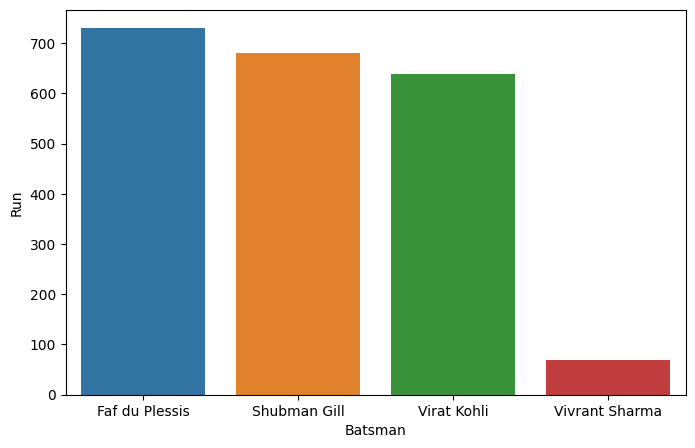

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x="Batsman", y = 'Run', data=middle_order)

In [34]:
players.append("VIRAT KOHLI")

In [35]:
lower_order = temp_df[(temp_df['batting_avg'] > 35) & (temp_df['Strike_rate'] > 155) & (temp_df['boundry_percent'] > 60) & (temp_df['avg_ball_faced'] > 15) ]

In [36]:
lower_order

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted,avg_ball_faced
30,Cameron Green,381,7,54.428571,239,159.414226,242,63.517060,14,17.0
54,Heinrich Klaasen,448,9,49.777778,253,177.075099,278,62.053571,11,23.0
147,Shivam Dube,385,9,42.777778,240,160.416667,246,63.896104,12,20.0
151,Suryakumar Yadav,511,11,46.454545,276,185.144928,368,72.015656,14,20.0
154,Tilak Varma,274,7,39.142857,174,157.471264,192,70.072993,9,19.0
164,Vijay Shankar,287,7,41.000000,178,161.235955,192,66.898955,9,20.0
174,Yashasvi Jaiswal,625,13,48.076923,382,163.612565,488,78.080000,14,27.0


<Axes: xlabel='Batsman', ylabel='Run'>

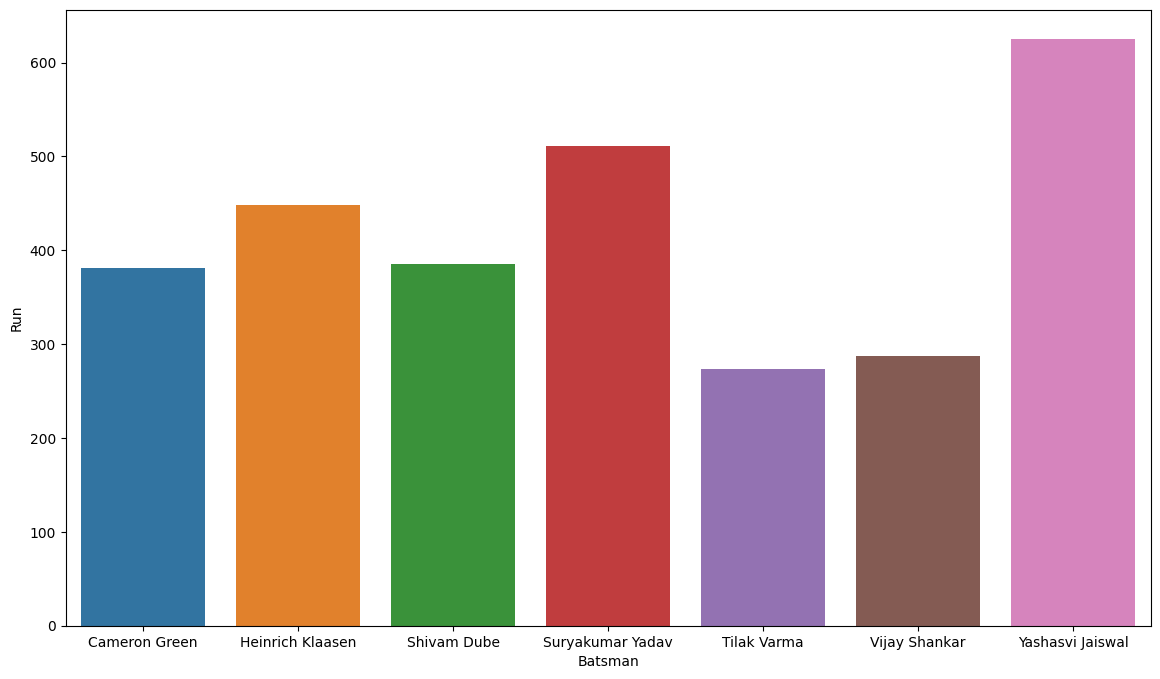

In [37]:
plt.figure(figsize=(14,8))
sns.barplot(x="Batsman", y = 'Run', data=lower_order)

In [38]:
players.append('SURYAKUMAR YADAV')
players.append("HEINRICH KLAASEN")

In [39]:
players

['FAF DU PLESIS',
 'SHUBMAN GILL',
 'VIRAT KOHLI',
 'SURYAKUMAR YADAV',
 'HEINRICH KLAASEN']

In [40]:
all_rounder = temp_df[(temp_df['batting_avg'] > 30) & (temp_df['Strike_rate'] > 155) & (temp_df['time_batted'] > 5) &(temp_df['boundry_percent']>60)& (temp_df['avg_ball_faced'] > 15) & (temp_df['time_batted']>10) ]

In [41]:
all_rounder

,Batsman,Run,out_or_not,batting_avg,Ball,Strike_rate,runs_by_boundries,boundry_percent,time_batted,avg_ball_faced
30,Cameron Green,381,7,54.428571,239,159.414226,242,63.517060,14,17.0
45,Glenn Maxwell,400,12,33.333333,218,183.486239,302,75.500000,14,16.0
54,Heinrich Klaasen,448,9,49.777778,253,177.075099,278,62.053571,11,23.0
147,Shivam Dube,385,9,42.777778,240,160.416667,246,63.896104,12,20.0
151,Suryakumar Yadav,511,11,46.454545,276,185.144928,368,72.015656,14,20.0
174,Yashasvi Jaiswal,625,13,48.076923,382,163.612565,488,78.080000,14,27.0


<Axes: xlabel='Batsman', ylabel='Run'>

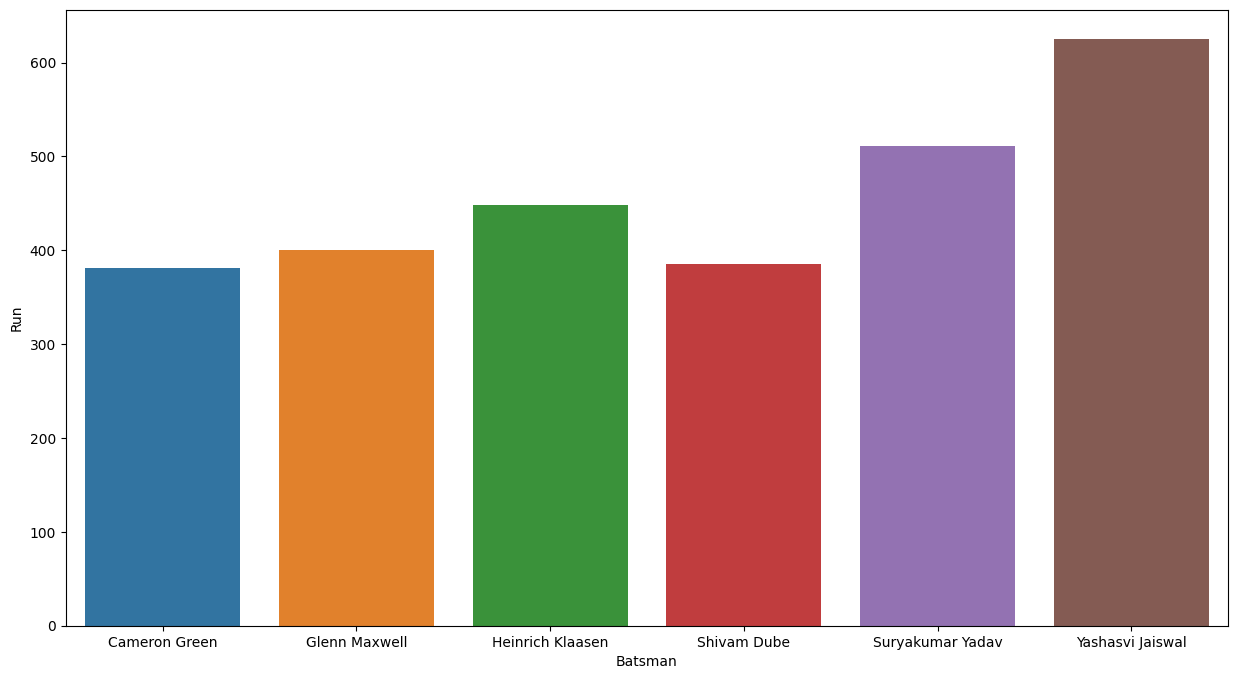

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x="Batsman", y = 'Run', data=all_rounder)

In [43]:
players.append("CAMERON GREEN")
players.append("GLENN MAXWELL")

In [44]:
players

['FAF DU PLESIS',
 'SHUBMAN GILL',
 'VIRAT KOHLI',
 'SURYAKUMAR YADAV',
 'HEINRICH KLAASEN',
 'CAMERON GREEN',
 'GLENN MAXWELL']

In [45]:
df_bowling

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3
...,...,...,...,...,...,...,...,...
848,70,Wayne Parnell,Royal Challengers Bangalore,3.1,42,0,1,13.5
849,70,Vijaykumar Vyshak,Royal Challengers Bangalore,4.0,40,1,0,10.0
850,70,Himanshu Sharma,Royal Challengers Bangalore,3.0,28,0,0,9.3
851,70,Harshal Patel,Royal Challengers Bangalore,4.0,29,1,0,7.3


In [46]:
total_wickets = df_bowling.groupby("Bowler")['wicket'].sum().sort_index().reset_index()

In [47]:
total_wickets.rename(columns={"wicket":"total_wicket"},inplace=True)

In [48]:
total_wickets

,Bowler,total_wicket
0,Abhishek Sharma,2
1,Adam Zampa,8
2,Adil Rashid,2
3,Aiden Markram,1
4,Akash Deep,1
...,...,...
132,Yash Dayal,2
133,Yash Thakur,10
134,Yudhvir Singh,1
135,Yudhvir Singh Charak,2


In [49]:
df_bowling['ball_bowled'] = df_bowling['over']*6

In [50]:
total_ball = df_bowling.groupby("Bowler")['ball_bowled'].sum().sort_index().reset_index()

In [51]:
temp_df2 = pd.merge(total_ball, total_wickets, on='Bowler')

In [52]:
temp_df2['bowler_strike_rate'] = temp_df2['ball_bowled']/temp_df2['total_wicket']

In [53]:
total_runs_given = df_bowling.groupby("Bowler")['run'].sum().sort_index().reset_index()

In [54]:
temp_df2 = pd.merge(temp_df2, total_runs_given, on='Bowler')

In [55]:
temp_df2['bowling_avg'] = temp_df2['run']/ temp_df2['total_wicket']

In [56]:
avg_eco = df_bowling.groupby("Bowler")['ECO'].mean().sort_index().reset_index()

In [57]:
temp_df2 = pd.merge(temp_df2, avg_eco, on='Bowler')

In [58]:
bowlers = temp_df2[(temp_df2['ECO']<8) & (temp_df2['bowler_strike_rate']<16) & (temp_df2['bowling_avg']<20)]

<Axes: xlabel='Bowler', ylabel='total_wicket'>

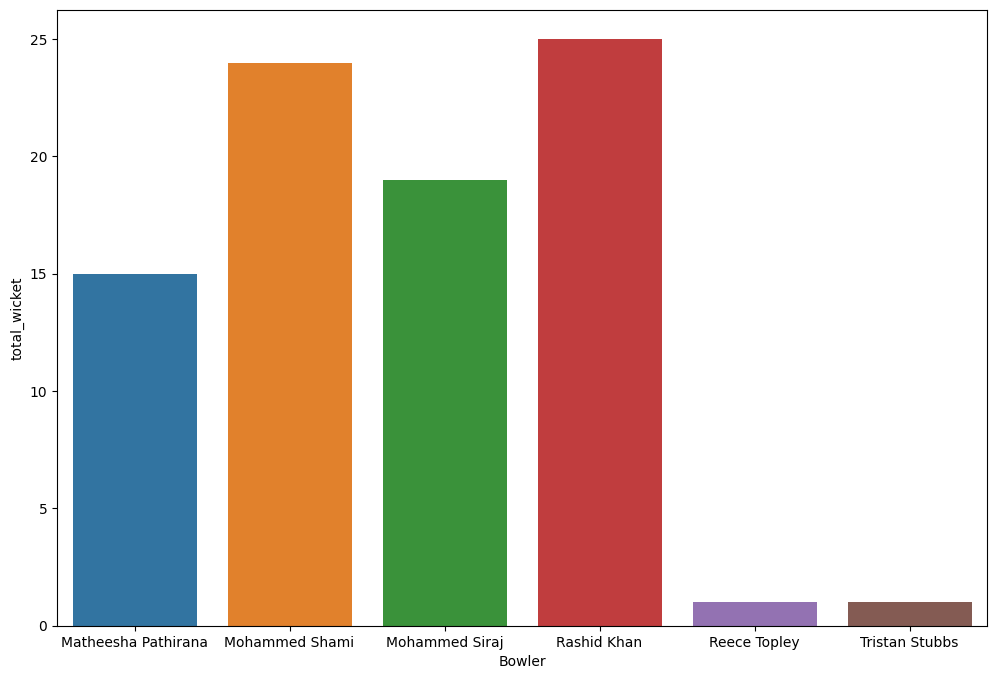

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x='Bowler', y='total_wicket', data=bowlers)

In [60]:
players.append("RASHID KHAN")
players.append('MOHAMMED SHAMI')
players.append("MATHEESHA PATHIRANA")

In [61]:
players.append('MOHAMMED SIRAJ')

In [62]:
players

['FAF DU PLESIS',
 'SHUBMAN GILL',
 'VIRAT KOHLI',
 'SURYAKUMAR YADAV',
 'HEINRICH KLAASEN',
 'CAMERON GREEN',
 'GLENN MAXWELL',
 'RASHID KHAN',
 'MOHAMMED SHAMI',
 'MATHEESHA PATHIRANA',
 'MOHAMMED SIRAJ']